In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install xgboost scikit-learn pandas seaborn joblib --quiet

XGBoost Model Accuracy: 0.9178

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92     58800
           1       0.95      0.88      0.91     58799

    accuracy                           0.92    117599
   macro avg       0.92      0.92      0.92    117599
weighted avg       0.92      0.92      0.92    117599



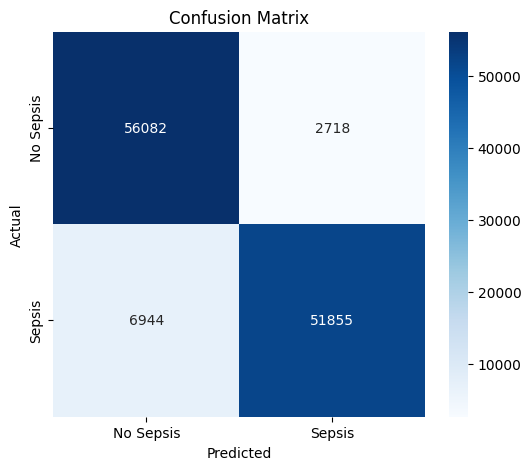

XGBoost Model saved as: /content/drive/MyDrive/xgboost_sepsis_model.pkl


In [ ]:
import pandas as pd
import xgboost as xgb
import joblib  # To save the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load the dataset
file_path = "/content/drive/MyDrive/cleaned_sepsis_data.csv"
df = pd.read_csv(file_path)

# Fix column names (remove special characters)
df.columns = df.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)

# Step 1: Separate features and target
X = df.drop(columns=["SepsisLabel"])  # Features
y = df["SepsisLabel"]  # Target

# Step 2: Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Train the XGBoost model
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    n_estimators=100,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = xgb_model.predict(X_test)

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Model Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: Confusion Matrix Visualization
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Sepsis", "Sepsis"], yticklabels=["No Sepsis", "Sepsis"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 7: Save the trained model
os.makedirs("models", exist_ok=True)  # Ensure directory exists
model_path = "/content/drive/MyDrive/xgboost_sepsis_model.pkl"
joblib.dump(xgb_model, model_path)
print(f"XGBoost Model saved as: {model_path}")



✅ Model Test Accuracy: 0.9193

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92    293997
           1       0.95      0.88      0.92    293997

    accuracy                           0.92    587994
   macro avg       0.92      0.92      0.92    587994
weighted avg       0.92      0.92      0.92    587994



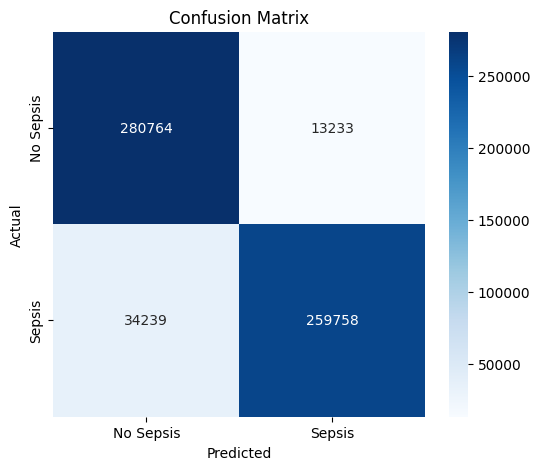

In [ ]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the trained model
model_path = "/content/drive/MyDrive/xgboost_sepsis_model.pkl"
xgb_model = joblib.load(model_path)

# Load test dataset
test_file_path = "/content/drive/MyDrive/cleaned_sepsis_data.csv"  # Change if needed
df_test = pd.read_csv(test_file_path)

# Fix column names (remove special characters)
df_test.columns = df_test.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)

# Separate features and target
X_test = df_test.drop(columns=["SepsisLabel"])
y_test = df_test["SepsisLabel"]

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Test Accuracy: {accuracy:.4f}\n")
print("📌 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Sepsis", "Sepsis"], yticklabels=["No Sepsis", "Sepsis"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.9 MB/s eta 0:00:00


0:	learn: 0.6750306	test: 0.6746656	best: 0.6746656 (0)	total: 169ms	remaining: 1m 24s
100:	learn: 0.9116742	test: 0.9114533	best: 0.9114533 (100)	total: 13.4s	remaining: 52.8s
200:	learn: 0.9211599	test: 0.9209857	best: 0.9209857 (200)	total: 26.7s	remaining: 39.7s
300:	learn: 0.9381243	test: 0.9384774	best: 0.9384774 (300)	total: 39.8s	remaining: 26.3s
400:	learn: 0.9505543	test: 0.9502717	best: 0.9502717 (400)	total: 53.2s	remaining: 13.1s
499:	learn: 0.9585667	test: 0.9578483	best: 0.9578653 (498)	total: 1m 6s	remaining: 0us

bestTest = 0.957865288
bestIteration = 498

Shrink model to first 499 iterations.
✅ CatBoost Model Accuracy: 0.9579

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     58800
           1       0.99      0.93      0.96     58799

    accuracy                           0.96    117599
   macro avg       0.96      0.96      0.96    117599
weighted avg       0.96      0.96      0.96    11

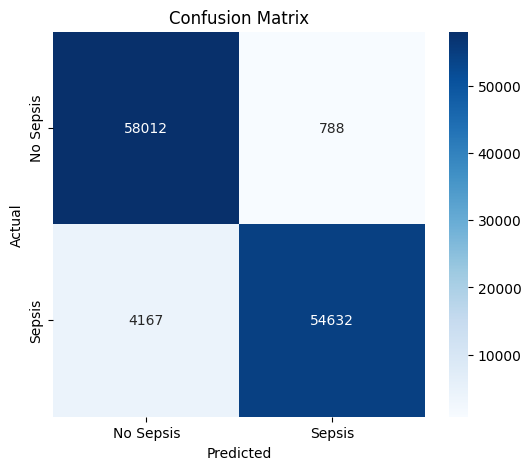

✅ CatBoost Model saved as: /content/drive/MyDrive/catboost_sepsis_model.cbm


In [ ]:
import pandas as pd
import catboost as cb
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load the dataset
file_path = "/content/drive/MyDrive/cleaned_sepsis_data.csv"
df = pd.read_csv(file_path)

# Fix column names (remove special characters)
df.columns = df.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)

# Separate features and target
X = df.drop(columns=["SepsisLabel"])  # Features
y = df["SepsisLabel"]  # Target

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the CatBoost model
cat_model = cb.CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.05,
    loss_function='Logloss',
    eval_metric='Accuracy',
    random_seed=42,
    verbose=100
)

# Train the CatBoost model
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)

# Make predictions
y_pred = cat_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ CatBoost Model Accuracy: {accuracy:.4f}\n")
print("📌 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Sepsis", "Sepsis"], yticklabels=["No Sepsis", "Sepsis"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Ensure directory exists
os.makedirs("models", exist_ok=True)

# Save the trained model
model_path = "/content/drive/MyDrive/catboost_sepsis_model.cbm"
cat_model.save_model(model_path)
print(f"✅ CatBoost Model saved as: {model_path}")


✅ CatBoost Model Test Accuracy: 0.9584

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96    293997
           1       0.99      0.93      0.96    293997

    accuracy                           0.96    587994
   macro avg       0.96      0.96      0.96    587994
weighted avg       0.96      0.96      0.96    587994



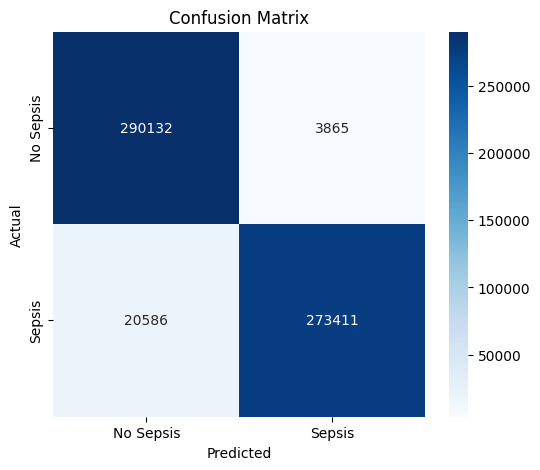

In [ ]:
import pandas as pd
import catboost as cb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the trained CatBoost model
model_path = "/content/drive/MyDrive/catboost_sepsis_model.cbm"
cat_model = cb.CatBoostClassifier()
cat_model.load_model(model_path)

# Load the test dataset
test_file_path = "/content/drive/MyDrive/cleaned_sepsis_data.csv"  # Change if using a different file
df_test = pd.read_csv(test_file_path)

# Fix column names (remove special characters)
df_test.columns = df_test.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)

# Separate features and target
X_test = df_test.drop(columns=["SepsisLabel"])  # Features
y_test = df_test["SepsisLabel"]  # Target

# Make predictions
y_pred = cat_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ CatBoost Model Test Accuracy: {accuracy:.4f}\n")
print("📌 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Sepsis", "Sepsis"], yticklabels=["No Sepsis", "Sepsis"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
